# **Title: 10.2 Exercise**
# **Author: Michael J. Montana**
# **Date: 21 May 2023**
# **Modified By: N/A**
# **Description: Using various models to perform sentiment analysis**

# <font color=ed7b11>**Using the hotel reviews dataset, create a sentiment analysis model using at least one of the methods described this week (you’re welcome to create more than one). Be sure to have three data slices - train, validation, and test as specified in the text.**

Note that the "sentiment" is expressed in the Is_Response, which should be label encoded (0=happy, 1=not happy). If you're not familiar with label encoding, check this out: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

NOTE: the author imports a contractions package, which failed for me. You're encouraged to use your text normalizer (which has its own contractions.py) from Week 4.

A few other notes:
- TensorFlow has had a new release, which means that if you install TF 2.0, some things won't work. You have some choices:
    - Install TF 1.0
    - If you install TF 2.0, use import tensorflow.compat.v1 as tf
- In both the book (page 647), the author uses np.vectorize on the cleansed train, validation, and test text. Don't do this.
- The author sets TOTAL_STEPS=1500 and STEP_SIZE=100 in the Model Training section of the code. Unless you are working in the cloud or have a mega powerful PC, don't set those values that high. (Your model will take many hours to train.) Instead, use TOTAL_STEPS=100 and STEP_SIZE=10. While the resulting model won't be as accurate, it'll still do the trick for this assignment (and even with the lower values, expect the training to take 20-30 minutes or more if you have a slow PC).
Be sure to document your thought process and interpretation of the results within Markdown in your Notebook.

In [15]:
import pandas as pd
hotel_df = pd.read_csv('data/hotel-reviews.csv')
movie_df=pd.read_csv('data/movie_reviews.csv')#using to validate all models work before switching to hotel data

# <font color=ed7b11>**Cleaning**

In [16]:
from myclassesv6 import Normalize_Corpus
import nltk
# #using nltk stopword list with but, not, and no removed
# stopword_list=nltk.corpus.stopwords.words('english')
# stopword_list.remove("but")
# stopword_list.remove("not")
# stopword_list.remove("no")
#
# norm=Normalize_Corpus()#instantitaing class
#
# # # cleaning movie data
# # movie_clean = movie_df
# # print('Movie Reviews:')
# # movie_clean['review']= norm.normalize(movie_clean['review'],stopword_list, html_stripping=True, contraction_expansion=True,
# #                                              accented_char_removal=True, text_lower_case=True,
# #                                              text_lemmatization=True, special_char_removal=True,
# #                                              stopword_removal=True, digits_removal=True)
# # cleaning hotel data
# hotel_clean = hotel_df
# print('Hotel Reviews:')
# hotel_clean['Description']= norm.normalize(hotel_clean['Description'],stopword_list, html_stripping=True, contraction_expansion=True,
#                                              accented_char_removal=True, text_lower_case=True,
#                                              text_lemmatization=True, special_char_removal=True,
#                                              stopword_removal=True, digits_removal=True)



In [17]:
# dataset=hotel_clean.copy()
# dataset['sentiment'] = dataset['Is_Response'].astype('category').cat.codes
# dataset = dataset.rename(columns={'Description':'review'})
# dataset = dataset.drop(columns=['User_ID','Browser_Used','Device_Used','Is_Response'])
# dataset.to_csv('data/hotel-reviews_clean.csv', index=False)
# # movie_clean.to_csv('data/movie_reviews_clean.csv',index=False)

# <font color=ed7b11>**Load Saved .csv**

In [18]:
import pandas as pd
movie_clean=pd.read_csv('data/movie_reviews_clean.csv')
dataset = pd.read_csv('data/clean_hotel_review.csv')
dataset.info()
sen_count = dataset['sentiment'].value_counts(0)
print('\n\nSentiment count:\n',sen_count, sep="")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     38932 non-null  object
 1   sentiment  38932 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 608.4+ KB


Sentiment count:
0    26521
1    12411
Name: sentiment, dtype: int64


# <font color=ed7b11>**Training, Testing, and Validation Data Split**

In [19]:
from sklearn.model_selection import train_test_split#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#splitting dataset into training and testing; using stratify to match positive/negative ratios for the samples
rev_train, rev_test, sen_train, sen_test=train_test_split(dataset['review'],dataset['sentiment'], test_size=.15, random_state=1, stratify=dataset['sentiment'])
#splitting validation from training
rev_train, rev_val, sen_train, sen_val=train_test_split(rev_train,sen_train, test_size=.17, random_state=1, stratify=sen_train)
print('Count:\n\tTraining:',len(rev_train),'\n\tTesting:',len(rev_test),'\n\tValidation:',len(rev_val),)
print('\nPos/Neg Distribution:\nTraining:\n',sen_train.value_counts(normalize=True),'\n\nTesting:\n', sen_test.value_counts(normalize=True),'\n\nValidation:\n',sen_val.value_counts(normalize=True),sep="")

Count:
	Training: 27466 
	Testing: 5840 
	Validation: 5626

Pos/Neg Distribution:
Training:
0    0.681206
1    0.318794
Name: sentiment, dtype: float64

Testing:
0    0.681164
1    0.318836
Name: sentiment, dtype: float64

Validation:
0    0.681301
1    0.318699
Name: sentiment, dtype: float64


# <font color=ed7b11>**Text Blob**

In [20]:
import pandas as pd
import numpy as np
from myclassesv6 import Model_Evaluation

meu=Model_Evaluation() #instantiating Model_Evaluation Class
np.set_printoptions(precision=2, linewidth=80) #formatting print output

reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])


test_reviews = rev_test
test_sentiments = sen_test
sample_review_ids = [1713, 15232, 30796]

In [21]:
import textblob
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', textblob.TextBlob(review).sentiment.polarity)
    print('-'*60)

REVIEW: book hotel bascially location hotel need go well cost category meet expectation neighborhood not bad close downtown area nightlife bar club place go shop plenty
Actual Sentiment: 1
Predicted Sentiment polarity: 0.3499999999999999
------------------------------------------------------------
REVIEW: nd stay pleased request king bed but check nice young man ask would prefer two full bed large room say sure get room amazed much large one last time actually corner room quite value want say great location broadway walk magestic theatre no problem definitely stay
Actual Sentiment: 0
Predicted Sentiment polarity: 0.29805194805194807
------------------------------------------------------------
REVIEW: recently stay marriott property great location near union square recently renovate room standard feature quite large sf standard service ok not great specially restaurant wait oer minute waiter come able sit good location good price
Actual Sentiment: 1
Predicted Sentiment polarity: 0.26703

In [22]:
sentiment_polarity = [textblob.TextBlob(review).sentiment.polarity for review in test_reviews]
predicted_sentiments = [0 if score >= 0.1 else 1 for score in sentiment_polarity]
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments, classes=[0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.8034
Precision: 0.8056
Recall: 0.8034
F1 Score: 0.7875

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3978
           1       0.82      0.49      0.62      1862

    accuracy                           0.80      5840
   macro avg       0.81      0.72      0.74      5840
weighted avg       0.81      0.80      0.79      5840


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0       3773  205
        1        943  919


# <font color=ed7b11>**AFINN Lexicon**

In [23]:
from afinn import Afinn
afn = Afinn(emoticons=True)
sentiment_polarity = [afn.score(review) for review in test_reviews]
predicted_sentiments = [0 if score >= 0.1 else 1 for score in sentiment_polarity]
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments, classes=[0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.769
Precision: 0.7966
Recall: 0.769
F1 Score: 0.7292

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      3978
           1       0.89      0.32      0.47      1862

    accuracy                           0.77      5840
   macro avg       0.82      0.65      0.66      5840
weighted avg       0.80      0.77      0.73      5840


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0       3904   74
        1       1275  587


# <font color=ed7b11>**SentiWordNet Lexicon**

In [24]:
from nltk.corpus import sentiwordnet as swn

awesome = list(swn.senti_synsets('awesome', 'a'))[0]
print('Positive Polarity Score:', awesome.pos_score())
print('Negative Polarity Score:', awesome.neg_score())
print('Objective Score:', awesome.obj_score())

Positive Polarity Score: 0.875
Negative Polarity Score: 0.125
Objective Score: 0.0


In [25]:
import nltk
def analyze_sentiment_sentiwordnet_lexicon(review, verbose):
    # tokenize and POS tag text tokens
    text_tokens = nltk.word_tokenize(review)
    tagged_text = nltk.pos_tag(text_tokens)
    pos_score = neg_score = token_count = obj_score = 0
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word, tag in tagged_text:
        if verbose:
            print(word, tag)
        ss_set = None
        if 'NN' in tag and swn.senti_synsets(word, 'n'):
            ss_set = swn.senti_synsets(word, 'n')
        elif 'VB' in tag and swn.senti_synsets(word, 'v'):
            ss_set = swn.senti_synsets(word, 'v')
        elif 'JJ' in tag and swn.senti_synsets(word, 'a'):
            ss_set = swn.senti_synsets(word, 'a')
        elif 'RB' in tag and swn.senti_synsets(word, 'r'):
            ss_set = swn.senti_synsets(word, 'r')
        # if senti-synset is found
        if ss_set:
            for synst in ss_set:
                # add scores for all found synsets
                pos_score += synst.pos_score()
                neg_score += synst.neg_score()
                obj_score += synst.obj_score()
                token_count += 1

    # aggregate final scores
    final_score = pos_score - neg_score
    norm_final_score = round(float(final_score) / token_count, 2)
    final_sentiment = 'positive' if norm_final_score >= 0 else 'negative'
    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score,
                                         norm_pos_score, norm_neg_score,
                                         norm_final_score]],
                                         columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'],
                                                                      ['Predicted Sentiment', 'Objectivity',
                                                                       'Positive', 'Negative', 'Overall']],
                                                              codes=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)

    return final_sentiment

for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_sentiwordnet_lexicon(review, verbose=True)
    print('-'*60)

REVIEW: book hotel bascially location hotel need go well cost category meet expectation neighborhood not bad close downtown area nightlife bar club place go shop plenty
Actual Sentiment: 1
book NN
hotel NN
bascially RB
location JJ
hotel NN
need NN
go VBP
well RB
cost RB
category JJ
meet NN
expectation NN
neighborhood VBD
not RB
bad JJ
close RB
downtown JJ
area NN
nightlife NN
bar NN
club NN
place NN
go VBP
shop NN
plenty NN
     SENTIMENT STATS:                                      
  Predicted Sentiment Objectivity Positive Negative Overall
0            negative        0.87     0.05     0.08   -0.02
------------------------------------------------------------
REVIEW: nd stay pleased request king bed but check nice young man ask would prefer two full bed large room say sure get room amazed much large one last time actually corner room quite value want say great location broadway walk magestic theatre no problem definitely stay
Actual Sentiment: 0
nd JJ
stay NN
pleased JJ
request NN
kin

# <font color=ed7b11>**Vader Lexicon**

In [ ]:
nltk.download('vader_lexicon')

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment_vader_lexicon(review, threshold=0.1, verbose=False):
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 0 if agg_score >= threshold\
                                   else 1
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'],
                                                                      ['Predicted Sentiment', 'Polarity Score',
                                                                       'Positive', 'Negative',
                                                                       'Neutral']],
                                                              codes=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)

    return final_sentiment

In [29]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=True)
    print('-'*60)

REVIEW: book hotel bascially location hotel need go well cost category meet expectation neighborhood not bad close downtown area nightlife bar club place go shop plenty
Actual Sentiment: 1
     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0                   0           0.61    18.0%     0.0%   82.0%
------------------------------------------------------------
REVIEW: nd stay pleased request king bed but check nice young man ask would prefer two full bed large room say sure get room amazed much large one last time actually corner room quite value want say great location broadway walk magestic theatre no problem definitely stay
Actual Sentiment: 0
     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0                   0           0.97    39.0%     9.0%   52.0%
------------------------------------------------------------
REVIEW: recently st

In [30]:
predicted_sentiments = [analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=False) for review in test_reviews]
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments, classes=[0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.7724
Precision: 0.7815
Recall: 0.7724
F1 Score: 0.7424

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      3978
           1       0.82      0.37      0.51      1862

    accuracy                           0.77      5840
   macro avg       0.79      0.67      0.68      5840
weighted avg       0.78      0.77      0.74      5840


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0       3824  154
        1       1175  687


# <font color=ed7b11>**Classifying Sentiment with Supervised Learning**

In [31]:
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])
# rev_train
# rev_test
# sen_train
# sen_test
# rev_val
# sen_val

train_reviews =rev_train
train_sentiments =sen_train
test_reviews =rev_test
test_sentiments = sen_test

# <font color=ed7b11>**Traditional Supervised Machine Learning Models**

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# BOW Feature Training reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(train_reviews)

# TFIDF Feature Training
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2), sublinear_tf=True)
tv_train_features = tv.fit_transform(train_reviews)

# Transform Features for Testing
cv_test_features = cv.transform(test_reviews)
tv_test_features= tv.transform(test_reviews)

print('BOW model:\n\tTRAIN features shape:', cv_train_features.shape,
      '\n\tTEST features shape:', cv_test_features.shape,
      '\n\nTFIDF mode:\n\tTRAIN features shape:', tv_train_features.shape,
      '\n\tTEST features shape:', tv_test_features.shape,sep='')

BOW model:
	TRAIN features shape:(27466, 759756)
	TEST features shape:(5840, 759756)

TFIDF mode:
	TRAIN features shape:(27466, 759756)
	TEST features shape:(5840, 759756)


In [36]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

# Logistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr, train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions, classes=[0, 1])

Model Performance metrics:
------------------------------
Accuracy: 0.8813
Precision: 0.8799
Recall: 0.8813
F1 Score: 0.8798

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3978
           1       0.84      0.77      0.81      1862

    accuracy                           0.88      5840
   macro avg       0.87      0.85      0.86      5840
weighted avg       0.88      0.88      0.88      5840


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       3713   265
        1        428  1434


C:\Users\michaelmontana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
lr_tfidf_predictions = meu.train_predict_model(classifier=lr, train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions, classes=[0,1])

Model Performance metrics:
------------------------------
Accuracy: 0.88
Precision: 0.8795
Recall: 0.88
F1 Score: 0.8768

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3978
           1       0.87      0.73      0.79      1862

    accuracy                           0.88      5840
   macro avg       0.88      0.84      0.85      5840
weighted avg       0.88      0.88      0.88      5840


Prediction Confusion Matrix:
------------------------------
          Predicted:      
                   0     1
Actual: 0       3782   196
        1        505  1357


# <font color=ed7b11>**Analyzing Sentiment Causation and Interpreting Predictive Models**

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(train_reviews)
# build Logistic Regression model
lr = LogisticRegression()
lr.fit(cv_train_features, train_sentiments)

# Build Text Classification Pipeline
lr_pipeline = make_pipeline(cv, lr)

# save the list of prediction classes (positive, negative)
classes = list(lr_pipeline.classes_)

C:\Users\michaelmontana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
new_corpus = rev_test
lr_pipeline.predict(new_corpus)
pd.DataFrame(lr_pipeline.predict_proba(new_corpus), columns=classes)

,0,1
0,0.642899,0.357101
1,0.999367,0.000633
2,0.296102,0.703898
3,0.999891,0.000109
4,0.981500,0.018500
...,...,...
5835,0.999997,0.000003
5836,0.999906,0.000094
5837,0.999999,0.000001
5838,0.983898,0.016102


# <font color=ed7b11>**Chapter 11 Code**
A few other notes:
- TensorFlow has had a new release, which means that if you install TF 2.0, some things won't work. You have some choices:
    - Install TF 1.0
    - If you install TF 2.0, use import tensorflow.compat.v1 as tf
- In both the book (page 647), the author uses np.vectorize on the cleansed train, validation, and test text. Don't do this.
- The author sets TOTAL_STEPS=1500 and STEP_SIZE=100 in the Model Training section of the code. Unless you are working in the cloud or have a mega powerful PC, don't set those values that high. (Your model will take many hours to train.) Instead, use TOTAL_STEPS=100 and STEP_SIZE=10. While the resulting model won't be as accurate, it'll still do the trick for this assignment (and even with the lower values, expect the training to take 20-30 minutes or more if you have a slow PC).
Be sure to document your thought process and interpretation of the results within Markdown in your Notebook.

# <font color=ed7b11>**Importing Cleaned data and Splitting to Training, Testing, and Validation Datasets**

In [49]:
from sklearn.model_selection import train_test_split  #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import pandas as pd
movie_clean=pd.read_csv('data/movie_reviews_clean.csv')
dataset = pd.read_csv('data/clean_hotel_review.csv')
#splitting dataset into training and testing; using stratify to match positive/negative ratios for the samples
rev_train, rev_test, sen_train, sen_test = train_test_split(dataset['review'], dataset['sentiment'], test_size=.15,random_state=1, stratify=dataset['sentiment'])
#splitting validation from training
rev_train, rev_val, sen_train, sen_val = train_test_split(rev_train, sen_train, test_size=.17, random_state=1, stratify=sen_train)

In [144]:
#i couldn't figure out how to work around a step error when training the model using the split data; so i'm recombining the split data so the sample ratios match the population ratio of the dataset
rev=pd.concat([rev_train,rev_val,rev_test],ignore_index=False)
sen=pd.concat([sen_train,sen_val,sen_test],ignore_index=False)
dataset2 = pd.concat([rev,sen],axis=1)

In [194]:
#validatinging the data matches
print(dataset2[:5],'\n\n')
print(dataset.loc[35312])
print(dataset.loc[14829])
print(dataset.loc[421])
print(dataset.loc[33922])

                                                  review  sentiment
35312  stay four night conference book hotel hotwire ...          0
14829  much enjoy stay clean property convivial profe...          0
35653  stay property two night wife town wedding week...          0
421    stay hotel one bad experience ever management ...          1
33922  location super short walking distance attracti...          1 


review       use zaza houston several time past couple year...
sentiment                                                    1
Name: 35312, dtype: object
review       bathroom night executive suite small bathroom ...
sentiment                                                    1
Name: 14829, dtype: object
review       place go major renovation but really need conc...
sentiment                                                    1
Name: 421, dtype: object
review       wilshire hotel centrally locate los angeles ne...
sentiment                                                    0
Name: 

In [193]:
dataset=dataset2.reset_index(drop=True)#resetting the index and droping the old index
dataset.head()

,review,sentiment
0,stay four night conference book hotel hotwire ...,0
1,much enjoy stay clean property convivial profe...,0
2,stay property two night wife town wedding week...,0
3,stay hotel one bad experience ever management ...,1
4,location super short walking distance attracti...,1


In [174]:
#splitting the data as show in the examples
reviews = dataset['review'].values
sentiments = dataset['sentiment'].values

train_reviews = reviews[:27252]
train_sentiments = sentiments[:27252]

val_reviews = reviews[27252:33091]
val_sentiments = sentiments[27252:33091]

test_reviews = reviews[33091:]
test_sentiments = sentiments[33091:]

train_reviews.shape, val_reviews.shape, test_reviews.shape

((27252,), (5839,), (5841,))

# <font color=ed7b11>**Data Ingestion Functions**

In [175]:
import tensorflow as tf
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'sentence': train_reviews}, train_sentiments,
    batch_size=100, num_epochs=None, shuffle=True)

In [176]:
# Prediction on the whole training set.
predict_train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'sentence': train_reviews}, train_sentiments, shuffle=False)

In [177]:
# Prediction on the whole validation set.
predict_val_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'sentence': val_reviews}, val_sentiments, shuffle=False)

In [178]:
# Prediction on the test set.
predict_test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    {'sentence': test_reviews}, test_sentiments, shuffle=False)

# <font color=ed7b11>**Deep Learning Model with Universal Sentence Encoder**

In [182]:
import tensorflow_hub as hub
#build deep learning model with universal sentecnce encoder
#TF2.0 Saved Model (v4): Encoder of greater-than-word length text trained on a variety of data
embedding_feature = hub.text_embedding_column(
    key='sentence',
    module_spec="https://tfhub.dev/google/universal-sentence-encoder/2",
    trainable=False)

In [183]:
# A classifier for Tensor Flow DNN models which is deprecated and not recommended for new code. https://www.tensorflow.org/api_docs/python/tf/compat/v1/estimator/DNNClassifier
dnn = tf.compat.v1.estimator.DNNClassifier(
    hidden_units=[512, 128],
    feature_columns=[embedding_feature],
    n_classes=2,
    activation_fn=tf.nn.relu,
    dropout=0.1,
    optimizer=tf.compat.v1.train.AdagradOptimizer(learning_rate=0.005))

# <font color=ed7b11>**Model Training**

In [184]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import time

TOTAL_STEPS = 100 #change to 100 per instruction
STEP_SIZE = 10 #change to 10 per instruction
for step in range(0, TOTAL_STEPS+1, STEP_SIZE):
    print()
    print('-'*100)
    print('Training for step =', step) #provides a reference
    start_time = time.time() #capturing start time
    dnn.train(input_fn=train_input_fn, steps=STEP_SIZE) #
    elapsed_time = time.time() - start_time #calculates training time
    print('Train Time (s):', elapsed_time) #print training time
    print('Eval Metrics (Train):', dnn.evaluate(input_fn=predict_train_input_fn)) #evaluate using training data -- https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
    print('Eval Metrics (Validation):', dnn.evaluate(input_fn=predict_val_input_fn))


----------------------------------------------------------------------------------------------------
Training for step = 0
Train Time (s): 24.258042097091675
Eval Metrics (Train): {'accuracy': 0.6813078, 'accuracy_baseline': 0.6813078, 'auc': 0.8392061, 'auc_precision_recall': 0.7432021, 'average_loss': 0.56732553, 'label/mean': 0.3186922, 'loss': 72.5857, 'precision': 0.0, 'prediction/mean': 0.30486116, 'recall': 0.0, 'global_step': 10}
Eval Metrics (Validation): {'accuracy': 0.68076724, 'accuracy_baseline': 0.6807673, 'auc': 0.8473781, 'auc_precision_recall': 0.7511555, 'average_loss': 0.56684506, 'label/mean': 0.31923273, 'loss': 71.952354, 'precision': 0.0, 'prediction/mean': 0.30491608, 'recall': 0.0, 'global_step': 10}

----------------------------------------------------------------------------------------------------
Training for step = 10
Train Time (s): 23.592180728912354
Eval Metrics (Train): {'accuracy': 0.80210626, 'accuracy_baseline': 0.6813078, 'auc': 0.85238385, 'auc_p

# <font color=ed7b11>**Model Eval**

In [185]:
# Evaluating deep neural network model using test and training dataset
dnn.evaluate(input_fn=predict_train_input_fn)
dnn.evaluate(input_fn=predict_test_input_fn)

{'accuracy': 0.8255436,
 'accuracy_baseline': 0.681219,
 'auc': 0.887649,
 'auc_precision_recall': 0.8092628,
 'average_loss': 0.39228785,
 'label/mean': 0.31878102,
 'loss': 49.812027,
 'precision': 0.72504,
 'prediction/mean': 0.36065087,
 'recall': 0.7293233,
 'global_step': 110}

In [186]:
def get_predictions(estimator, input_fn):
    return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

predictions = get_predictions(estimator=dnn, input_fn=predict_test_input_fn)
predictions[:10]

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0]

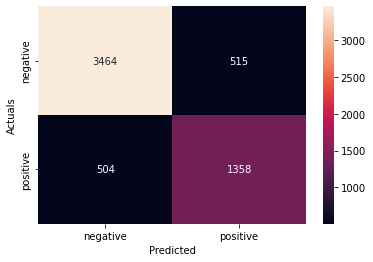

In [187]:
#producing a heatmap of the confusion matrix to show correct and incorrect prediction
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

with tf.compat.v1.Session() as session:
    cm = tf.compat.v1.confusion_matrix(test_sentiments, predictions).eval()

LABELS = ['negative', 'positive']
sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS, fmt='g')
xl = plt.xlabel("Predicted")
yl = plt.ylabel("Actuals")

In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_true=test_sentiments, y_pred=predictions, target_names=LABELS))

              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      3979
    positive       0.73      0.73      0.73      1862

    accuracy                           0.83      5841
   macro avg       0.80      0.80      0.80      5841
weighted avg       0.83      0.83      0.83      5841



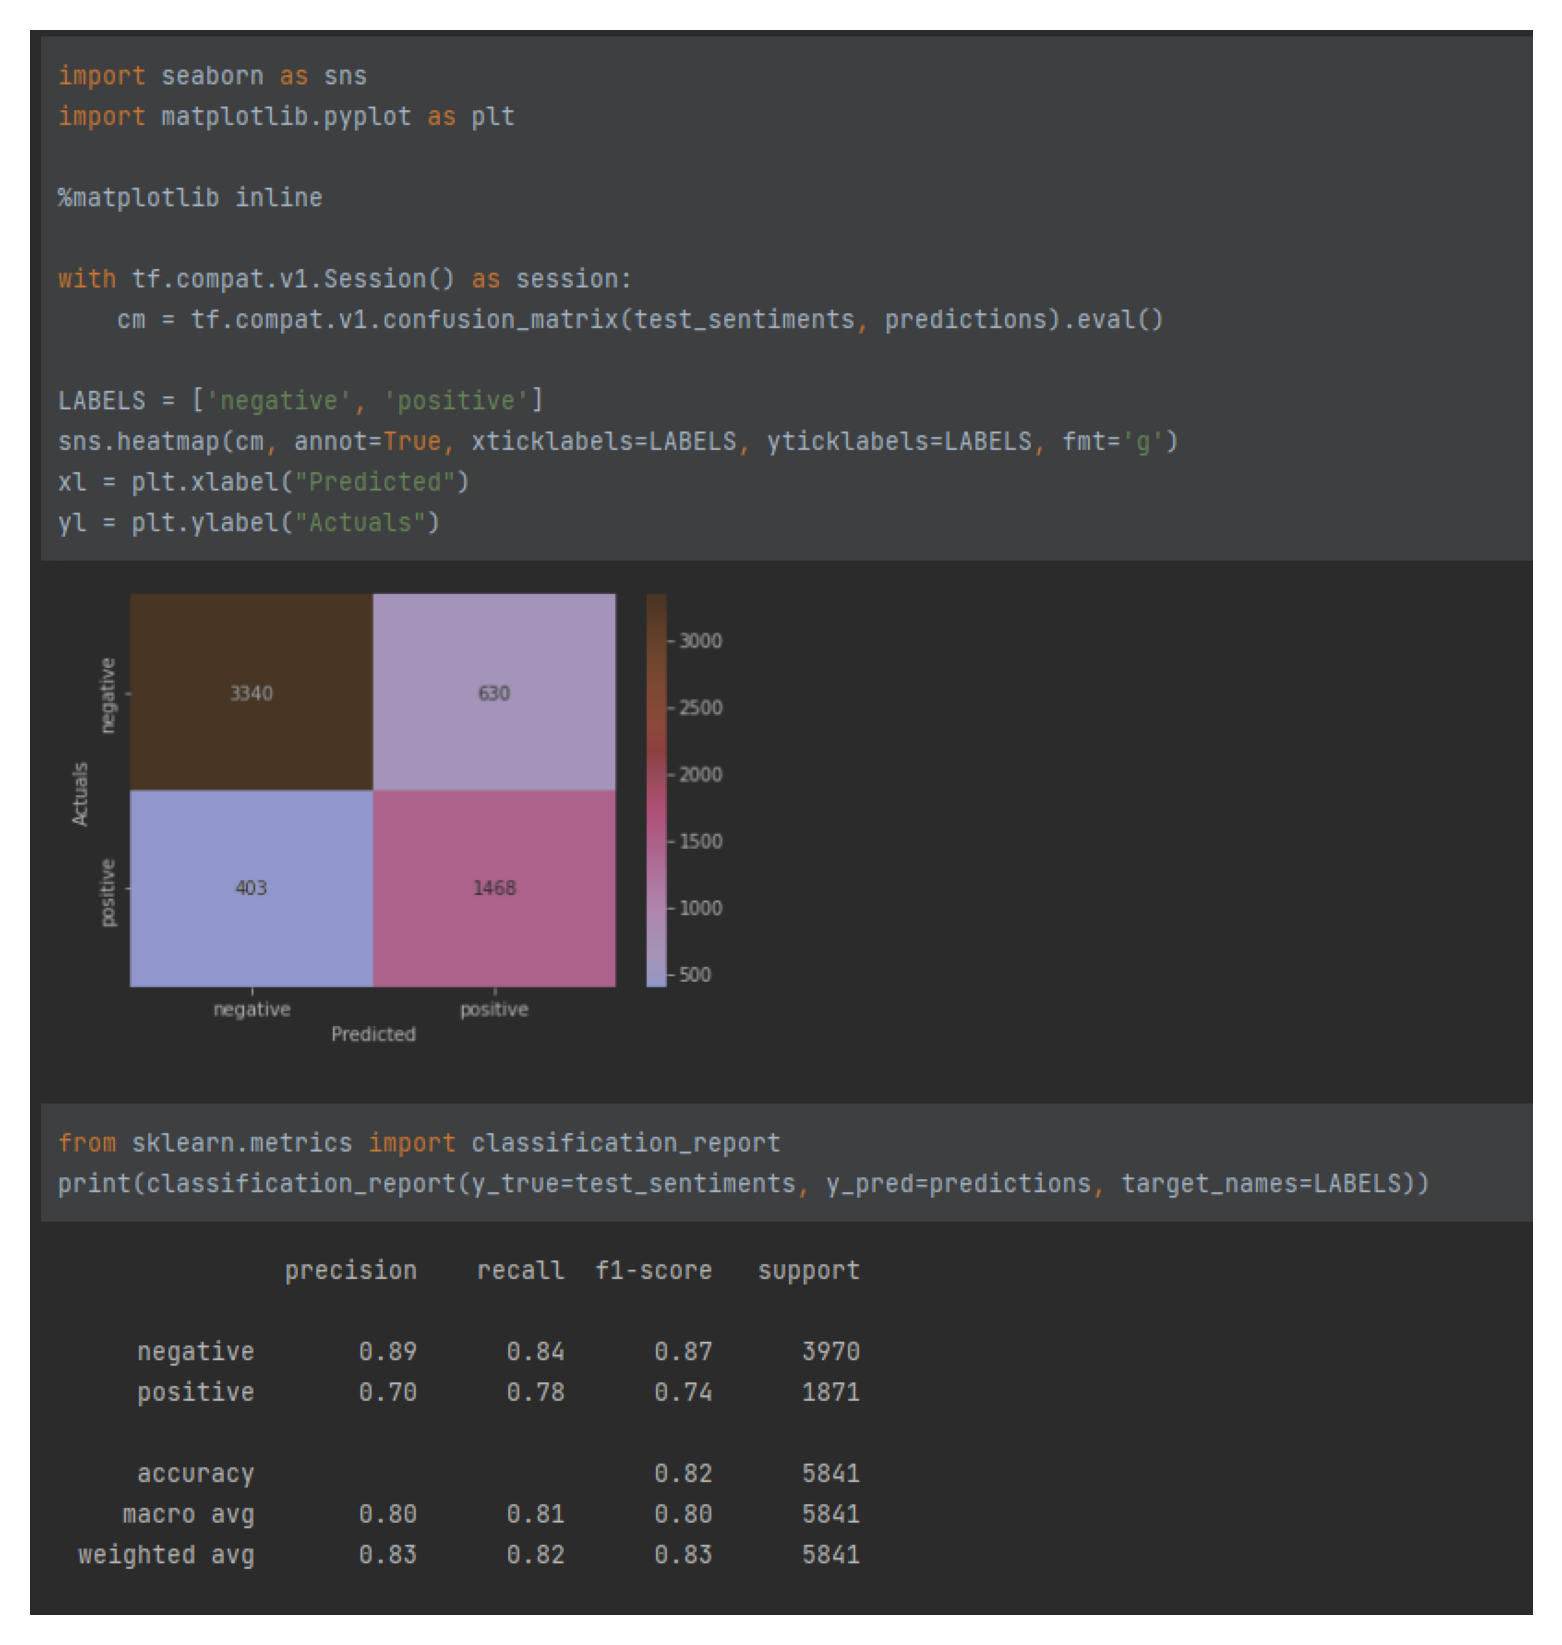

In [192]:
#Below is an screen snip of the output before i changed split and recombined the data to get a better distribution

import imageio.v3 as iio
forkscnshot = iio.imread('before_slicing_data.PNG')#importing screenshot
plt.figure(figsize=(7, 7), dpi=300)#setting image size and dpi to display large and clear enough to read
plt.imshow(forkscnshot)# displaying screenshot
plt.axis("off") # turning off the x and y axis
plt.show()#displaying images